#  Predicting Spotify Song Popularity with PyTorch

## Introduction
In this project, our aim is to build a machine learning model that can predict the popularity score (on a scale of 0 to 100) of songs on Spotify, based on their audio features. Instead of using traditional machine learning models such as linear regression or decision trees, we are implementing our solution using PyTorch, a powerful and flexible deep learning framework. The deep learning models built with PyTorch offer significant advantages like

- Flexibility and control: PyTorch allows us to design custom model architectures and training loops like customize layers and activation functions, add regularization, experiment with different loss functions and learning rates.
- Non-linear modeling capability: Neural networks can capture complex relationships between audio features and popularity that simple models might miss.
- Scalability and performance: With GPU support and industry-level optimization tools, PyTorch models can scale efficiently with data size and  complexity.
- Real-world relevance: PyTorch is widely used in both industry and research, making this project highly practical and transferable to real-world applications.
- Improved performance with tuning: Techniques like early stopping and learning rate scheduling

Our project consists of following parts:
1. **Load & preprocess** the dataset in PyTorch.
2. **Exploratory analysis** of the data to gain insights
3. **Define neural networks** in PyTorch to predict popularity from audio features.
4. **Train** the model using a regression loss function (MSELoss).
5. **Evaluate** the model’s performance using RMSE or MAE.
6. **Experiment** with different architectures, optimizers, and hyperparameters to improve accuracy.
7. **Document** the process, findings, and best-performing model.

## Load & preprocess

In this stage, we begin by importing all the necessary libraries and loading the dataset. We then perform an initial examination of the data to check for missing values, duplicate rows, and any other potential data quality issues. After addressing these, we clean and preprocess the dataset to ensure it is ready for modeling.
Finally, we split the cleaned dataset into training, validation and  test sets to prepare for building and evaluating our machine learning model.

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pytorch_tabnet.tab_model import TabNetRegressor
import matplotlib.pyplot as plt
import copy

In [2]:
#Load the data into a variable df
df=pd.read_csv('SpotifyFeatures.csv')
display (df)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

The dataset consists of 232,725 entries and 18 columns, each representing various features of songs sourced from Spotify. The columns are:
- genre:Genre classification of the song
- artist_name:Name of the performing artist
- track_name:Title of the song
- track_id:Unique identifier for each track
- popularity:Target variable, Spotify popularity score (0–100)
- acousticness:Confidence measure of whether the track is acoustic
- danceability:How suitable the track is for dancing
- duration_ms:Track duration in milliseconds
- energy:Intensity and activity level of the track
- instrumentalness: Prediction of whether the track contains vocals
- key:Estimated key of the track
- liveness:Presence of an audience in the recording
- loudness:Overall loudness of the track in decibels
- mode:Modality of the track (major/minor)
- speechiness:Presence of spoken words in the track
- tempo:Estimated tempo in beats per minute (BPM)
- time_signature:Estimated time signature
- valence:Musical positiveness or mood of the track

In [4]:
# Drop rows with missing values 
df = df.dropna()

In [5]:
#Recheck for missing values
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Upon inspection, we found that one track_name entry was missing. Since this information is essential for identifying the track, we decided to remove the corresponding row from the dataset. After dropping this row, we re-checked for missing values across all columns and confirmed that the dataset is now completely free of missing data.

In [6]:
#Check for duplicated track_ids
df['track_id'].duplicated().value_counts()

track_id
False    176773
True      55951
Name: count, dtype: int64

In [7]:
#Drop duplicate rows keeping the first occurrence
df = df.drop_duplicates(subset='track_id', keep='first')

From the above, we observed that the track_id column contained 55,951 duplicate entries, indicating that several songs were repeated in the dataset. To ensure each track appears only once, we removed the duplicates by retaining only the first occurrence of each track_id. As a result, the dataset was reduced to 176,773 unique entries, each representing a distinct song.

In [8]:
# Check whether the popularity score contains valid(0 to 100) values
invalid_popularity_values = df[(df['popularity'] < 0) | (df['popularity'] > 100)]
print(f"Number of invalid popularity scores: {len(invalid_popularity_values)}")

Number of invalid popularity scores: 0


Here, we validate the popularity column to ensure all values fall within the expected range of 0 to 100, as defined by Spotify’s scoring system. We found that all values are within this range, and there are no invalid or outlier entries in the popularity column.

In [9]:
#Remove outliers
max_duration_ms = 10 * 60 * 1000
outlier_durations = df[df['duration_ms'] > max_duration_ms]
df.drop(outlier_durations.index, inplace=True)
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000,174721.000000
mean,36.400730,0.400309,0.543296,227900.905306,0.559531,0.169064,0.223841,-10.062680,0.126429,117.365024,0.454161
std,17.389785,0.365098,0.189298,86630.690344,0.274725,0.320757,0.209928,6.351931,0.202228,31.326892,0.267182
min,0.000000,0.000000,0.057000,15387.000000,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.044500,0.418000,177600.000000,0.349000,0.000000,0.097600,-12.713000,0.036800,92.043000,0.226000
50%,37.000000,0.282000,0.560000,218587.000000,0.595000,0.000065,0.130000,-8.138000,0.049500,115.049000,0.444000
75%,49.000000,0.784000,0.684000,266072.000000,0.790000,0.080300,0.276000,-5.609000,0.102000,139.007000,0.669000
max,100.000000,0.996000,0.989000,600000.000000,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In the course of making this document, I discovered that duration_ms contains massive mathematical outliers that actually throw off our training code. For that reason, we'll cut anything over ten minutes long, which is less than 1% of our data

Next step is we want to describe the the features and target. The following features capture the musical structure of a track:
- mode: Indicates whether the song is in a major or minor key (categorical).
- time_signature: Represents the rhythmic structure or beats per measure.
- key: Specifies the musical key of the song


These features may not directly link a song to be popular (unlike tempo, energy, liveness or danceability), they can still carry  patterns that influence how a listener feels about a song and that, in turn, may affect its popularity.
For eg, Songs in major mode often feel happier, while minor songs feel sadder or more emotional. Certain moods might be more popular depending on trends or genres.So these features are not strong predictors on their own, can combine with other features to give the model a richer understanding of a track's musical composition which might affect song's popularity. Since these are categorical variables, we convert them into a numerical format using one-hot encoding before feeding them into the model.


In [10]:
# Target column
target = 'popularity'

# Categorical features to encode
categorical_features = ['mode', 'time_signature', 'key', 'genre']

# One-hot encode categorical features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [11]:
#Drop columns not included as features
exclude_cols = ['artist_name', 'track_name', 'track_id', 'popularity']
# Select all columns except the exclude list
features= df.columns.drop(exclude_cols).tolist()
# Final feature matrix and target array
X = df[features].values.astype(np.float32)  # Features
y = df[target].values.astype(np.float32)

In [12]:
#Train test splitting
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=12345)

# Second split: Validation and Test Set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345
)

Splits the standardized features (Scaled_X) and target (y) into training, validation and test sets.
- 60% of the data is used for training (X_train, y_train), 20% is  for validation (X_val, y_val) and 20% is reserved for testing (X_test, y_test).
The random_state ensures the split is reproducible.

In [13]:
# Scaling using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)     

Standardization scales features to have a mean of 0 and standard deviation of 1, ensuring all features contribute equally during training.
It's especially important for neural networks, as it helps:
- Improve training speed and stability
- Prevent feature dominance due to scale differences
- Ensure better performance with gradient-based optimizers
This step is essential for achieving balanced and efficient learning in deep learning models.

In [14]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

The above steps converts the data into PyTorch tensors. Data must be tensors to work with PyTorch models and using dtype=torch.float32 because neural networks expect float inputs, especially for regression targets.

In [15]:
# Wrap in TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

Combines features (X) and targets (y) into a single dataset object.

In [16]:
# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

DataLoader wraps the dataset and allows load data in batches. Here we use 64 samples per batch.Batching helps with efficient training and reduces memory use. Also, shuffle the training data each epoch (shuffle=True) for better generalization. For the test data and validation data, shuffling is disabled (shuffle=False) to keep evaluation consistent.

## Exploratory data analysis

Next stage, we conduct exploratory data analysis (EDA) to gain insights into the distribution of features, identify patterns or correlations, and better understand the relationship between audio features and song popularity.

C:\Users\jenee\AppData\Local\Temp\ipykernel_22880\1056841745.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['popularity'], shade=True)


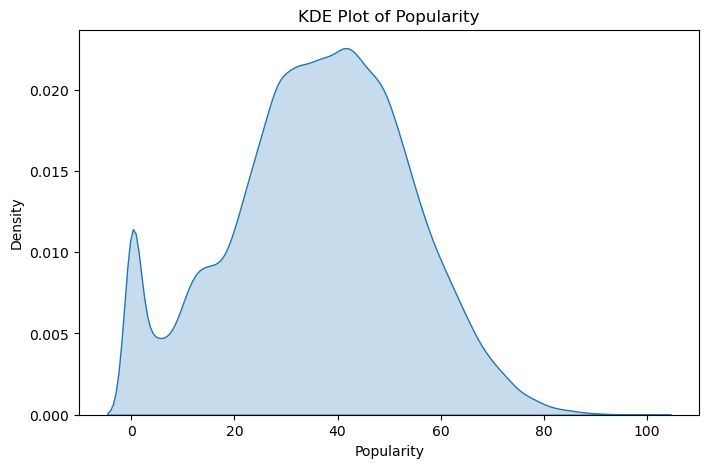

In [17]:
# Plot target variable 
plt.figure(figsize=(8, 5))
sns.kdeplot(df['popularity'], shade=True)
plt.title("KDE Plot of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Density")
plt.show()

## Define neural networks 

At this stage, define and compare different neural network architectures, such as feedforward and deep neural networks. Use a linear regression model as the baseline for performance comparison.

In [18]:
# Linear Regression Model (Baseline Model)
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  

    def forward(self, x):
        return self.linear(x)

Linear Regression model defines a single fully connected (linear) layer, mapping input_dim inputs to 1 output, representing the predicted target (popularity). Used as a baseline model, no hidden layers and activation functions, single linear transformation model.

In [19]:
# Feedforward Neural Network(basic neural network with one hidden layer)
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  
        )

    def forward(self, x):
        return self.model(x)

This class defines a basic feedforward neural network for regression using PyTorch. It consists of an input layer that feeds into a hidden layer with 32 neurons, followed by a ReLU activation function to introduce non-linearity, and a final output layer that produces a single value output. The workflow shown below:

Input (e.g., features) --- Linear(input_dim - 32) --- ReLU -  Linear(32 - 1) --- Output (popularity
)

In [20]:
#Deep Neural Network
class DeepNN(nn.Module):
    def __init__(self, input_dim):
        super(DeepNN, self).__init__()
        self.model= nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

This class defines a deeper feedforward neural network using PyTorch, designed to learn more complex patterns in data. It consists of multiple hidden layers: the input is first passed through a linear layer with 128 neurons, followed by ReLU activation, then through two additional hidden layers with 64 and 32 neurons respectively, each also followed by ReLU activations. Finally, the output layer maps the last hidden representation to a single continuous value, making it suitable for regression tasks such as predicting song popularity.The workflow is outlined below:

Input (features)---Linear (input_dim - 128)---ReLU---Linear (128 - 64)---ReLU---Linear (64 - 32) ---ReLU---Linear (32 -1)---Output


In [21]:
# Popularitypredictor (Manual layer by layer control)
class Popularitypredictor(nn.Module):
    def __init__(self, input_dim):
        super(Popularitypredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)         # Second hidden layer
        self.fc3 = nn.Linear(64, 32)          # Third hidden layer
        self.output = nn.Linear(32, 1)        # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)  
        return x

This class defines a deep neural network in PyTorch with manual layer-by-layer control, allowing more flexibility compared to using nn.Sequential. It includes three hidden layers and an output layer, making it suitable for capturing complex relationships in the input data. The model takes input features and passes them through the first linear layer (fc1) with 128 neurons, followed by a ReLU activation to introduce non-linearity. This output is then passed through the second layer (fc2) with 64 neurons and another ReLU, followed by the third layer (fc3) with 32 neurons and ReLU again. Finally, the data flows into the output layer (output), which reduces the dimensionality to a single value which represents the predicted popularity.
The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU---Linear (128 - 64)---ReLU---Linear (64 - 32) ---ReLU---Linear (32 -1)---Output

When compared with DeepNN method, this method defines each layer individually and applies activations manually in the forward method, giving  more control for customization (like adding dropout, batch normalizations etc.)

In [22]:
#Neural Network with Dropout (to prevent overfitting) 
class DropoutNN(nn.Module):
    def __init__(self, input_dim):
        super(DropoutNN, self).__init__()
        self.model= nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

This class defines a neural network similar to a typical feedforward model but with dropout layers added to help prevent overfitting and improve generalization. This network starts with a linear layer that maps the input features to 128 neurons, followed by a ReLU activation to introduce non-linearity. Then, a dropout layer with a dropout probability of 0.3 randomly disables 30% of the neurons during trainin. This pattern repeats with a second linear layer reducing to 64 neurons, another ReLU activation, and another dropout layer. Finally, the network outputs a single value through a linear layer, suitable for regression tasks like predicting popularity. Including dropout layers helps the model avoid memorizing the training data and improves its ability to generalize well on unseen data. The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU Activation---Dropout (p=0.3)---Linear Layer (128 - 64)---ReLU Activation---Dropout (p=0.3)---Linear Layer (64 - 1)---Output (predicted popularity)

In [23]:
# Manual layer by layer control with dropout
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.output(x)  
        return x

This class defines a multi-layer perceptron with manual layer-by-layer control, incorporating dropout to reduce overfitting. It consists of three fully connected layers with sizes 128, 64, and 32 neurons, respectively, each followed by a ReLU activation to introduce non-linearity. After the first and second hidden layers, a dropout layer with a dropout rate of 0.2 is applied, randomly disabling 20% of neurons during training to encourage the network to learn more robust features and improve generalization. Finally, the output layer maps the features from the last hidden layer to a single continuous value. The workflow is outlined below:

Input (features)---Linear Layer (input_dim - 128)---ReLU Activation---Dropout (p=0.2)---Linear Layer (128 - 64)---ReLU Activation---Dropout (p=0.2)---Linear Layer (64 - 1)---Output (predicted popularity)

## Train the model

In this stage, a training function is developed to train the different models. The steps includes:
- Set the model to training mode
- Iterate through epochs
- Iterate through batches:Within each epoch, iterate over batches of data provided by the DataLoader
  
       * Forward Pass
       * Calculate Loss
       * Zero Gradients
       * Backward Pass
       * Optimizer Step

In [24]:
# Training function

def train_model(model, train_loader, criterion, optimizer, 
                X_val_tensor, y_val_tensor, num_epochs=100, patience=10):
    train_losses = []
    best_mse = float('inf')
    best_model_state = None
    no_improved_echos = 0

    for epoch in range(num_epochs):
    # Model in training mode 
        model.train()
        epoch_loss = 0
    #Loop for the number of epochs
    for epoch in range(num_epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            #Resets the gradients
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            #Calculate Loss
            loss = criterion(outputs, y_batch)
            loss.backward()
            #Updates the model parameters
            optimizer.step()
            #Total loss for the epoch
            epoch_loss += loss.item() * X_batch.size(0)
        epoch_loss /= len(train_loader.dataset)
        train_losses.append(epoch_loss)
        model.eval()
        with torch.no_grad():
            y_val_pred= model(X_val_tensor).squeeze().cpu().numpy()
            y_val_true = y_val_tensor.cpu().numpy().squeeze()
            
            mse = mean_squared_error(y_val_true, y_val_pred)
            
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

     #  Check for improvement
        if  mse < best_mse:
            best_mse = mse
            best_model_state = copy.deepcopy(model.state_dict())
            no_improved_echos = 0
        else:
            no_improved_echos += 1
            if no_improved_echos >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)
    return train_losses

## Evaluate the model

The evaluate_model function assesses a trained model's performance on validation data set.  The function generates predictions by passing the valid input tensor X_val_tensor through the model and squeezing the output to remove unnecessary dimensions. Both predictions and true labels are moved to the CPU and converted to NumPy arrays for compatibility with scikit-learn metrics. It then calculates the Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) to quantify the model's prediction accuracy, and returns both as evaluation.

In [25]:
# Evaluation function

def evaluate_model(model, X_val_tensor, y_val_tensor):
    model.eval()
    with torch.no_grad():
        y_pred= model(X_val_tensor).squeeze().cpu().numpy()
        y_true = y_val_tensor.squeeze().cpu().numpy()
        
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

## Experimentation

In this stage, we are comparing six PyTorch models and a TabNetRegressor on the same dataset. Experimented with different hidden layer sizes, dropout for regularization, early stopping etc. For each model, three key performance metrics MSE, RMSE, and MAE are computed on the validation data, enabling a thorough assessment. Also, selects the model with the lowest MSE as the best model.

In [26]:
#NumPy arrays for TabNetRegressor
X_train_np = X_train.astype('float32')
X_val_np=X_val.astype('float32')
X_test_np = X_test.astype('float32')
y_train_np = y_train.reshape(-1, 1).astype('float32')
y_val_np=y_val.reshape(-1, 1).astype('float32')
y_test_np = y_test.reshape(-1, 1).astype('float32')

In [27]:
# Training and Evaluation Loop

def train_and_evaluate_all_models(
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor,
    X_train_np, y_train_np, 
    X_val_np, y_val_np,
    batch_size=64
):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = X_train_tensor.shape[1]
    
    # Differnt models
    
    model_classes = {
        "LinearRegression": LinearRegressionModel,
        "SimpleNN": SimpleNN,
        "DeepNN": DeepNN,
        "Popularitypredictor": Popularitypredictor,
        "DropoutNN": DropoutNN,
        "MLP": MLP
        }

    results = []
    train_losses_list = []
    model_names_list = []

    # Move training data to device
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_val_tensor = X_val_tensor.to(device)
    y_val_tensor = y_val_tensor.to(device)
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    
    #Initialization
    best_mse = float('inf')
    best_model_name = None
    best_model = None
    
    # Train PyTorch models
    for name, model_class in model_classes.items():
        print(f"\n Training {name}....")
        model = model_class(input_dim).to(device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_losses = train_model(
            model, train_loader, criterion, optimizer,
            X_val_tensor, y_val_tensor,
            num_epochs=100, patience=10
        )

        mse, rmse, mae = evaluate_model(model, X_val_tensor, y_val_tensor)

        print(f"{name} MSE (Val): {mse:.4f}, RMSE (Val): {rmse:.4f}, MAE (Val): {mae:.4f}")
        results.append({"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae})
        train_losses_list.append(train_losses)
        model_names_list.append(name)

        if  mse < best_mse:
            best_mse = mse
            best_model_name = name
            best_model = model
    print("\n Training TabNetRegressor....")

    # Tabnet Model
    tabnet_model = TabNetRegressor(device_name=device)
    tabnet_model.fit(
        X_train=X_train_np, y_train=y_train_np,
        eval_set=[(X_val_np, y_val_np)],
        eval_name=["val"],
        eval_metric=["rmse"],
        max_epochs=100,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False,
       )

    y_pred_tabnet = tabnet_model.predict(X_val_np).squeeze()
    y_val_true = y_val_np.squeeze()

    mse_tabnet = mean_squared_error(y_val_true, y_pred_tabnet)
    rmse_tabnet = np.sqrt(mean_squared_error( y_val_true, y_pred_tabnet))
    mae_tabnet = mean_absolute_error(y_val_true, y_pred_tabnet)
    print(f" TabNetRegressor  MSE: {mse_tabnet:.4f}, RMSE: {rmse_tabnet:.4f}, MAE: {mae_tabnet:.4f}")
    results.append({"Model": "TabNet", "MSE": mse_tabnet, "RMSE": rmse_tabnet, "MAE": mae_tabnet})
    train_losses_list.append(tabnet_model.history['loss'])
    model_names_list.append("TabNet")

    if  mse_tabnet < best_mse:
        best_mse = mse_tabnet
        best_model_name = "TabNet"
        best_model = tabnet_model

    print(f"\n Best Model based on validation MSE: {best_model_name} (MSE: {best_mse:.4f})")
    return pd.DataFrame(results), train_losses_list, model_names_list, best_model_name, best_model
   

In [28]:
# Results
results_df, train_losses_list, model_names_list, best_model_name, best_model= train_and_evaluate_all_models(
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor,
    X_train_np, y_train_np, 
    X_val_np, y_val_np,
    batch_size=64
)


 Training LinearRegression....
Epoch 1/100, Loss: 1498.8960
Epoch 2/100, Loss: 1315.0154
Epoch 3/100, Loss: 1176.3910
Epoch 4/100, Loss: 1059.2717
Epoch 5/100, Loss: 955.6155
Epoch 6/100, Loss: 861.2979
Epoch 7/100, Loss: 774.2436
Epoch 8/100, Loss: 693.4178
Epoch 9/100, Loss: 618.2955
Epoch 10/100, Loss: 548.5762
Epoch 11/100, Loss: 484.1959
Epoch 12/100, Loss: 425.0010
Epoch 13/100, Loss: 370.9170
Epoch 14/100, Loss: 321.9398
Epoch 15/100, Loss: 278.0229
Epoch 16/100, Loss: 239.1101
Epoch 17/100, Loss: 205.1586
Epoch 18/100, Loss: 176.0496
Epoch 19/100, Loss: 151.7328
Epoch 20/100, Loss: 132.1065
Epoch 21/100, Loss: 117.0326
Epoch 22/100, Loss: 106.2186
Epoch 23/100, Loss: 99.3166
Epoch 24/100, Loss: 95.6840
Epoch 25/100, Loss: 94.3279
Epoch 26/100, Loss: 94.0370
Epoch 27/100, Loss: 93.9930
Epoch 28/100, Loss: 93.9875
Epoch 29/100, Loss: 93.9836
Epoch 30/100, Loss: 93.9853
Epoch 31/100, Loss: 93.9867
Epoch 32/100, Loss: 93.9849
Epoch 33/100, Loss: 93.9816
Epoch 34/100, Loss: 93.9811

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 581.38852| val_rmse: 10.062410354614258|  0:00:16s
epoch 1  | loss: 98.88462| val_rmse: 9.787830352783203|  0:00:34s
epoch 2  | loss: 97.01393| val_rmse: 9.665889739990234|  0:00:53s
epoch 3  | loss: 95.41354| val_rmse: 9.663999557495117|  0:01:12s
epoch 4  | loss: 94.8391 | val_rmse: 9.687140464782715|  0:01:33s
epoch 5  | loss: 94.51094| val_rmse: 9.60770034790039|  0:01:51s
epoch 6  | loss: 94.0345 | val_rmse: 9.587699890136719|  0:02:07s
epoch 7  | loss: 94.08385| val_rmse: 9.614359855651855|  0:02:23s
epoch 8  | loss: 93.55538| val_rmse: 9.587989807128906|  0:02:40s
epoch 9  | loss: 92.96307| val_rmse: 9.566229820251465|  0:02:57s
epoch 10 | loss: 92.60109| val_rmse: 9.549559593200684|  0:03:16s
epoch 11 | loss: 92.49077| val_rmse: 9.563969612121582|  0:03:35s
epoch 12 | loss: 92.27107| val_rmse: 9.538680076599121|  0:03:53s
epoch 13 | loss: 92.45447| val_rmse: 9.550649642944336|  0:04:10s
epoch 14 | loss: 92.78561| val_rmse: 9.536789894104004|  0:04:29s
epoch 15 

C:\Users\jenee\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


 TabNetRegressor  MSE: 89.1876, RMSE: 9.4439, MAE: 7.1372

 Best Model based on validation MSE: TabNet (MSE: 89.1876)


In [29]:
#Print the results
print("\n Final Results sorted by MSE:\n")
print(results_df.sort_values(by='MSE', ascending=True))


 Final Results sorted by MSE:

                 Model        MSE      RMSE       MAE
6               TabNet  89.187622  9.443920  7.137245
1             SimpleNN  89.234985  9.446427  7.093431
4            DropoutNN  89.725723  9.472366  7.136629
5                  MLP  89.757851  9.474062  7.088856
3  Popularitypredictor  89.766884  9.474539  7.134008
2               DeepNN  89.948845  9.484137  7.173440
0     LinearRegression  93.541061  9.671662  7.269982


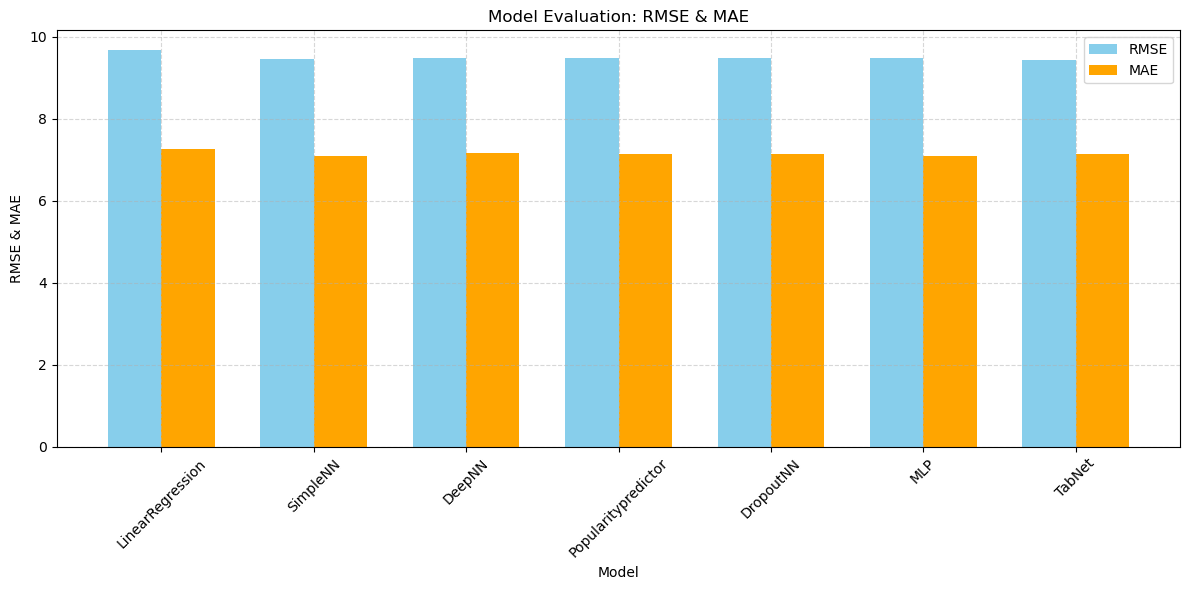

In [30]:
#Plot RMSE and MAE of different models
models = results_df['Model']
rmse_values = results_df['RMSE']
mae_values = results_df['MAE']

x = np.arange(len(models))  
width = 0.35  

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue')
plt.bar(x + width/2, mae_values, width, label='MAE', color='orange')

# Labels and title
plt.xlabel('Model')
plt.ylabel('RMSE & MAE')
plt.title('Model Evaluation: RMSE & MAE')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [31]:
# Ploting loss curves
def plot_multiple_loss_curves(loss_histories, model_names):
    plt.figure(figsize=(12, 7))
    for losses, name in zip(loss_histories, model_names):
        plt.plot(losses, label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

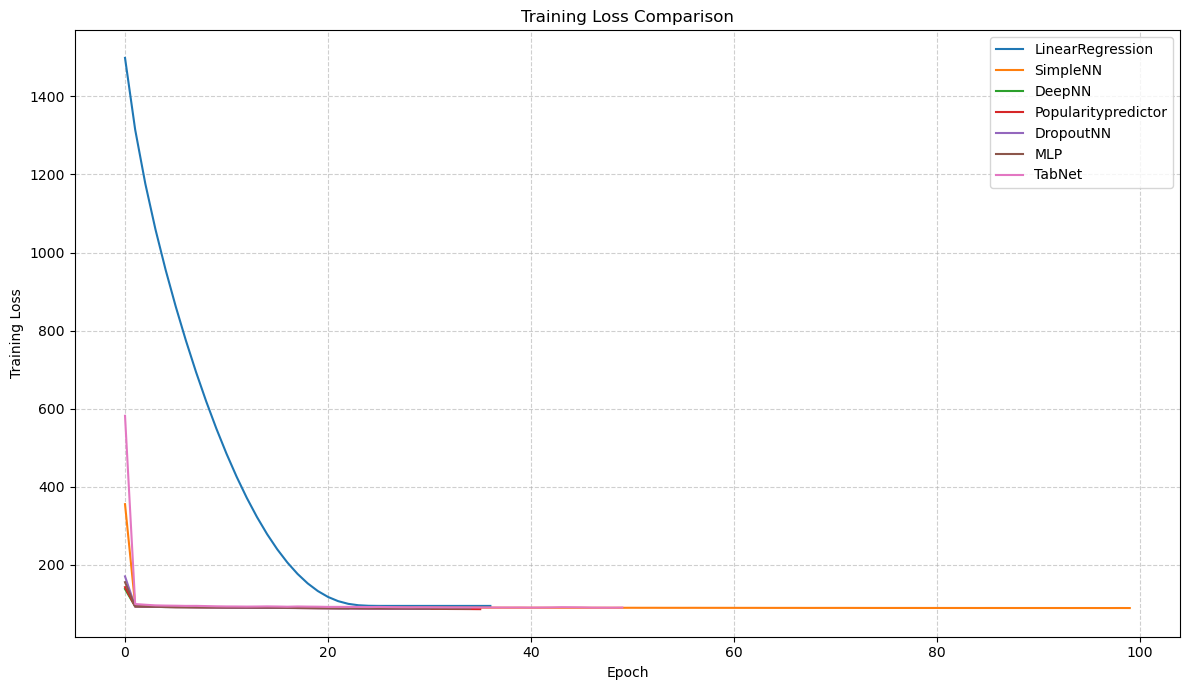

In [32]:
# Plot training loss curves for all models
plot_multiple_loss_curves(train_losses_list, model_names_list)

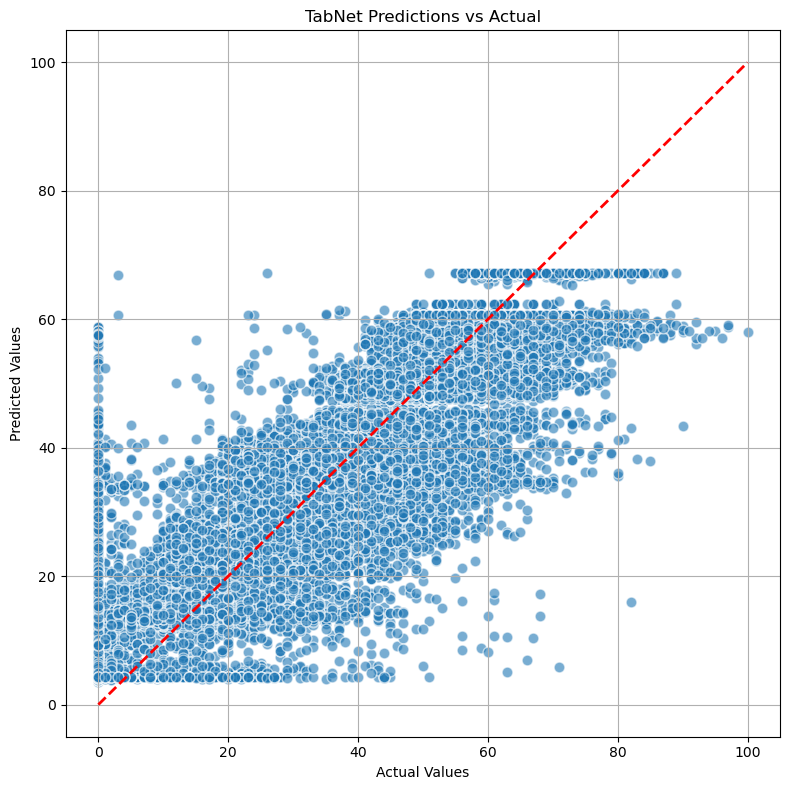

In [33]:
# Plot Predictions Vs actual on validate data of best model
if best_model_name == "TabNet":
    # Predict on test set
    y_pred = best_model.predict(X_val_np).squeeze()
    y_true = y_val_np.squeeze()

# Plot predictions vs actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', s=60)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"{best_model_name} Predictions vs Actual")
plt.grid(True)
plt.tight_layout()
plt.savefig("my_plot.png")
plt.show()

In [34]:
# Evaluvate the test results
if best_model_name == "TabNet":
    # Predict on test set
    y_test_pred = best_model.predict(X_test_np).squeeze()
    y_test_true = y_test_np.squeeze()

# Compute metrics
mse = mean_squared_error(y_test_true, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_true, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")

Test MSE: 89.9933
Test RMSE: 9.4865
Test MAE: 7.1488


The MSE, RMSE, and MAE values are quite close between validation and test sets which means our model predicts well, with no major overfitting or underfitting. TabNet slightly outperforms all others on all three metrics, making it the best choice overall. All other models except linear Regression model performed well and if we consider simple models with a faster output we can choose simpleNN model and if we prefer a complex model with a faster output choose deepNN or DropoutNN. 

## Conclusion

In this project our aim is to build a machine learning model that can predict the popularity score (on a scale of 0 to 100) of songs on Spotify, based on their audio features. The project divides into following steps:

#### Load & preprocess the dataset in PyTorch
In this stage, the dataset was prepared for model training through the following key steps:
1. Library and Dataset Loading
Essential Python libraries for data manipulation, visualization, preprocessing, and modeling (such as pandas, numpy, sklearn, and torch) were imported. The dataset was then loaded into a suitable data structure named df for analysis.
2. Handling Missing Values- One row containing missing values were found and removed to ensure data integrity.
3. Removing Duplicate Records-Duplicate rows were identified and dropped to eliminate redundancy and ensure the dataset reflects unique and meaningful observations.
4. Outlier Removal- Outliers are removed using appropriate statistical techniques to improve model performance.
5. Data Splitting- The cleaned dataset was split into training, validation, and test sets to enable model training, hyperparameter tuning, and unbiased performance evaluation.
6. Feature Scaling -A StandardScaler was applied to normalize the feature distributions, ensuring that all input variables contribute equally to the model learning process.
7. Categorical Encoding- One-hot encoding was used to convert categorical variables into a machine-readable numerical format.
8. Tensor Conversion-The preprocessed data was converted into PyTorch tensors to facilitate compatibility with neural network models.
9. DataLoader Wrapping- The training and validation tensors were wrapped using PyTorch’s DataLoader to allow for efficient batch processing and shuffling during training.

#### Exploratory analysis of the data to gain insights

  
#### Define neural networks in PyTorch to predict popularity from audio features 
In this stage define different PyTorch models like:
1. Linear Regression Model (Baseline Model) -  Defines a single fully connected (linear) layer, mapping input_dim inputs to 1 output, representing the predicted target (popularity).
2. Feedforward Neural Network - This model consists of an input layer that feeds into a hidden layer with 32 neurons, followed by a ReLU activation function to introduce non-linearity, and a final output layer that produces a single value output. 
3. Deep Neural Network - Consists of multiple hidden layers: the input is first passed through a linear layer with 128 neurons, followed by ReLU activation, then through two additional hidden layers with 64 and 32 neurons respectively, each also followed by ReLU activations. Finally, the output layer maps the last hidden representation to a single continuous value,
4. Popularitypredictor (Manual layer by layer control)-The model takes input features and passes them through the first linear layer (fc1) with 128 neurons, followed by a ReLU activation to introduce non-linearity. This output is then passed through the second layer (fc2) with 64 neurons and another ReLU, followed by the third layer (fc3) with 32 neurons and ReLU again. Finally, the data flows into the output layer (output), which reduces the dimensionality to a single value
5. Neural Network with Dropout - Defines a neural network similar to a typical feedforward model but with dropout layers added to help prevent overfitting and improve generalization 
6. MLP - Defines a multi-layer perceptron with manual layer-by-layer control, incorporating dropout to reduce overfitting.

#### Train the model using a regression loss function
In this stage, define a function to train the networks. Consists of following steps. 
1. Set the model to training mode
2. Iterate through epochs- Early stopping is implemented
3. Loss function used nn.MSELoss()
4. Iterate through batches:Within each epoch, iterate over batches of data provided by the DataLoader
      * Forward Pass
      * Calculate Loss
      * Zero Gradients
      * Backward Pass
      * Optimizer Step

#### Evaluate the model’s performance using MSE, RMSE or MAE 
In this stage, define a function to evaluvate each models. Calculate MSE, RMSE, MAE of each model.

#### Experimentation 
In this stage, a comprehensive model evaluation was conducted using six custom-built PyTorch models and one TabNetRegressor, all trained and validated on the same dataset. The goal was to identify the best-performing model based on multiple performance metrics.

**Models compared:**
- Linear Regression (baseline)
- Simple Neural Network (SimpleNN)
- Deep Neural Network (DeepNN)
- Popularity Predictor
- DropoutNN
- MLP
- TabNet Regressor
  
**Hyperparameters:**
- Maximum Epochs: 100
- Early Stopping: Enabled with patience = 10 based on validation MSE
- Regularization: Dropout layers experimented in some architectures
- Loss Function:All PyTorch models were trained using Mean Squared Error Loss (MSELoss)
- Optimizer:Models were optimized using the Adam optimizer, offering faster convergence in deep networks.
- Learning Rate:A fixed learning rate of 0.001 was used across all models, ensuring consistent comparison of convergence behavior and performance.

  
**Evaluation Metrics:**
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
  

These metrics were calculated on the validation set for fair model comparison.



<center><h3>Final Results Sorted by MSE:</h3></center>

  |Rank|               Model|        MSE|      RMSE|       MAE|
  |---------|-------|-------|------|-------|
|1|               TabNet|  89.187622|  9.443920|  7.137245|
|2|            SimpleNN|  89.234985|  9.446427|  7.093431|
|3|            DropoutNN|  89.725723|  9.472366 | 7.136629|
|4|                  MLP | 89.757851 | 9.474062|  7.088856|
|5|  Popularitypredictor|  89.766884|  9.474539|  7.134008|
|6|            DeepNN | 89.948845 | 9.484137|  7.173440|
|7|     LinearRegression|  93.541061 | 9.671662 | 7.269982|

**Observations:**

- TabNetRegressor achieved the lowest MSE and RMSE, making it the best model overall.
- DropoutNN, MLP, and PopularityPredictor all performed similarly with only minor differences in MSE and RMSE, suggesting these architectures are comparably effective for this task and get faster results than TabNet Regressor.
- Linear Regression had the worst performance across all metrics, indicates that non-linear models are better suited for this problem.
- The differences between the top 6 models are very small, indicating the dataset might be well-suited to multiple models.
- Plot loss curves of each model
- Plot best model Predictions Vs Actual values

**Final Evaluvation on Test Set**
After selecting the best model based on validation performance, we evaluated its performance on the unseen test set. The results are as follows:
- Test MSE: 89.9933
- Test RMSE: 9.4865
- Test MAE: 7.1488
  
The MSE, RMSE, and MAE values are quite close between validation and test sets which means our model predicts well, with no major overfitting or underfitting. By this project, we found  that TabNet delivers the highest overall performance. However, if deployment requirements prioritize faster inference or model simplicity, alternatives like SimpleNN or DropoutNN offer competitive results with only a slight reduction in accuracy.

